In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
#Loading the file (diabetes_prediction_dataset.csv)
Diabetes=pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
#File Inspection
print("Dataset Information")
Diabetes.info()
print("\n\nFirst 5 rows of the dataset")
Diabetes.head()


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


First 5 rows of the dataset


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
print("Last 5 rows of the dataset")
Diabetes.tail()

Last 5 rows of the dataset


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
#To check if there are null values or not
print("Display of null values:")
Diabetes.isnull().sum()

Display of null values:


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

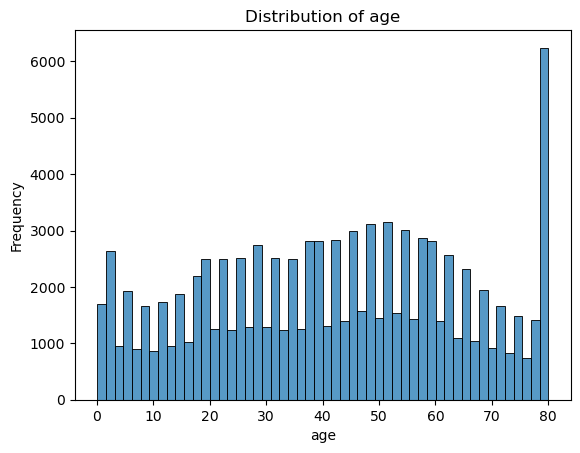

In [6]:
#Visualization 1
#Distribution of numerical variables
#Let us see that of age
plt.figure()
sns.histplot(Diabetes['age'])
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()


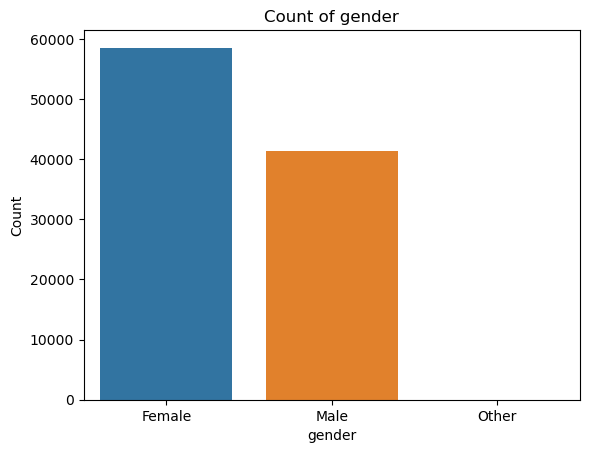

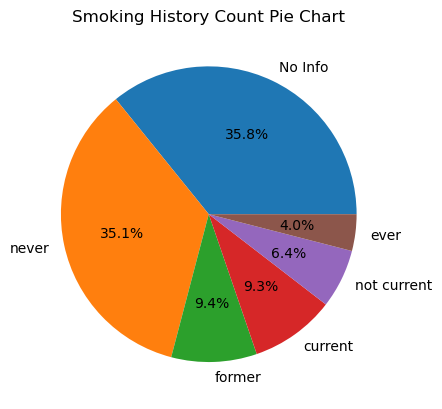

In [7]:
#Visualization 2
#Distribution of categorical variables
#Let us create for gender and smoking_history

plt.figure()
sns.countplot(x='gender',data=Diabetes)
plt.title('Count of gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()
Diabetes['smoking_history'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Smoking History Count Pie Chart')
plt.ylabel('')  # Hide the default ylabel
plt.show()

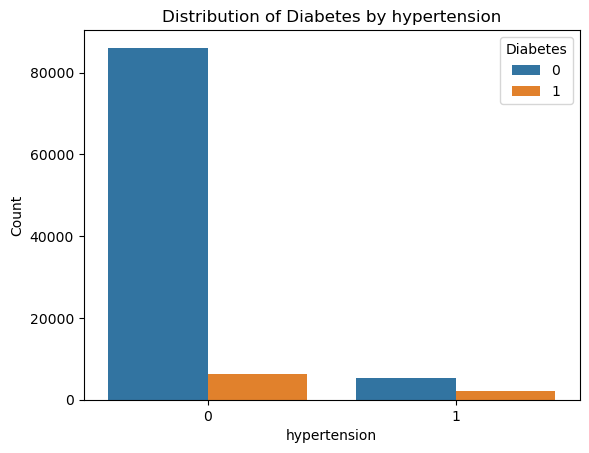

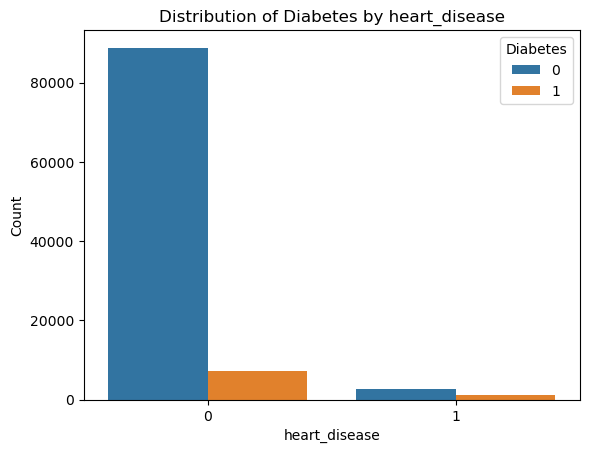

In [8]:
#Visualization 3
#Dependency of the target variable wrt categorical features
#Lets check that of hypertension and heart_disease
columns = ['hypertension', 'heart_disease']
for col in columns:
    plt.figure()
    sns.countplot(x=col, hue='diabetes', data=Diabetes)
    plt.title(f'Distribution of Diabetes by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Diabetes')
    plt.show()

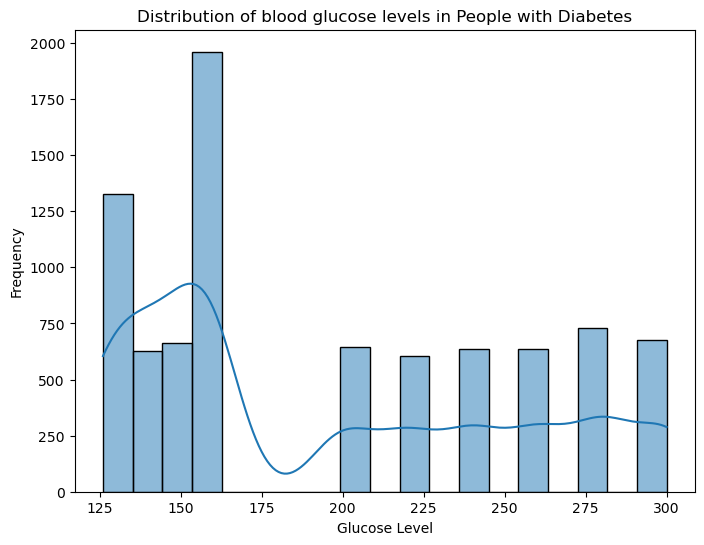

In [9]:
#Visualization 5
#And suppose if you want to check that whats the blood glucose level of the people suffering from diabetes
# Filter data for individuals with diabetes
diabetes_data = Diabetes[Diabetes['diabetes'] == 1]

# Plot histogram of insulin levels for people with diabetes
plt.figure(figsize=(8, 6))
sns.histplot(diabetes_data['blood_glucose_level'], kde=True)
plt.title('Distribution of blood glucose levels in People with Diabetes')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()

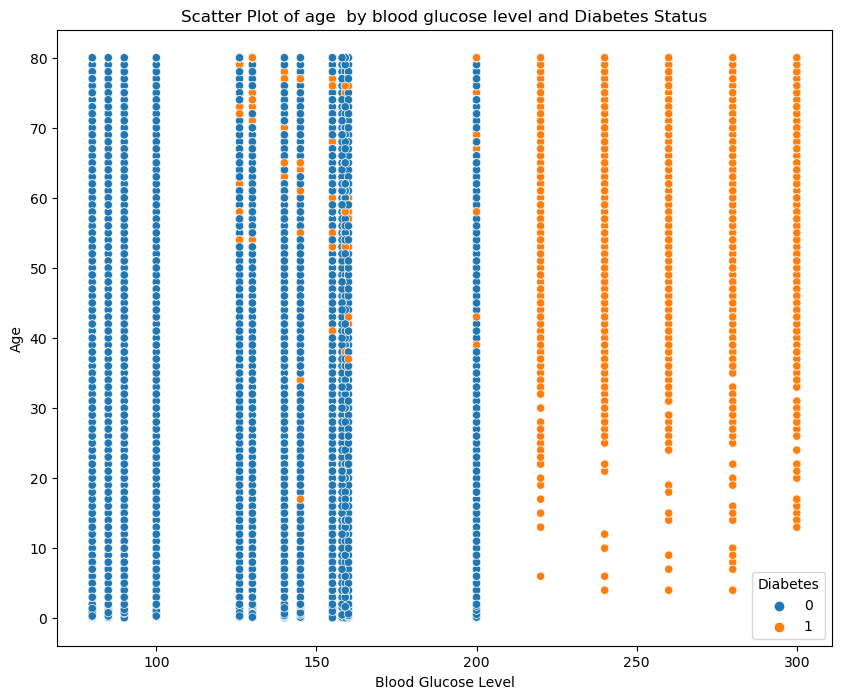

In [10]:
#Visualization 6
#Similarly if you want to check that whats the age and glucose level of the people suffering from diabetes
plt.figure(figsize=(10, 8))
sns.scatterplot(x='blood_glucose_level', y='age', hue='diabetes', data=Diabetes)
plt.title('Scatter Plot of age  by blood glucose level and Diabetes Status')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.legend(title='Diabetes')
plt.show()

In [11]:
# Encode the Target variable (Y -> 1, N -> 0)
label_encoder = LabelEncoder()
Diabetes['gender'] = label_encoder.fit_transform(Diabetes['gender'])
#Here Female->0 & Male->1
Diabetes['smoking_history'] = label_encoder.fit_transform(Diabetes['smoking_history'])
# Here
#0->If there is no record of that person
#1->If the person currently smokes
#2->If the person has ever smoked
#3->If the person used to smoke
#4->If the person has never smoked
#5->If the person does not currently smoke

In [12]:
#Updated dataframe
print("Updated dataframe after applying LabelEncoder:")
Diabetes.head()


Updated dataframe after applying LabelEncoder:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [13]:
#Checking the value of a particular row
print("Checking the value of a particular row:\n")
print(Diabetes.iloc[26])

Checking the value of a particular row:

gender                   1.00
age                     67.00
hypertension             0.00
heart_disease            1.00
smoking_history          5.00
bmi                     27.32
HbA1c_level              6.50
blood_glucose_level    200.00
diabetes                 1.00
Name: 26, dtype: float64


In [14]:
#Checking the dependency of the target variable('diabetes') with the help of correlation matrix for feature selection
print("Dependecy check(of 'diabetes') using Correlation Matrix for feature selection")
corr_matrix = Diabetes.corr()
corr_matrix['diabetes']



Dependecy check(of 'diabetes') using Correlation Matrix for feature selection


gender                 0.037411
age                    0.258008
hypertension           0.197823
heart_disease          0.171727
smoking_history        0.094290
bmi                    0.214357
HbA1c_level            0.400660
blood_glucose_level    0.419558
diabetes               1.000000
Name: diabetes, dtype: float64

In [15]:
#Feature Separating & selecting target variable
X=Diabetes.drop(['diabetes'],axis=1)
Y=Diabetes['diabetes']

In [16]:
#Data Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
#Train the model
model=LogisticRegression(max_iter=10000)
model.fit(X_train.values,Y_train)

LogisticRegression(max_iter=10000)

In [18]:
#taking user input
gender=int(input('''Enter gender: 
                    0->Female
                    1->Male\n'''))
age=float(input("Enter age: "))
hypertension=int(input('''Enter hypertension: 
                          0->if absent  
                          1->if present\n'''))
heart_disease=int(input('''Enter heart_disease: 
                           0-> If the  person has'nt been diagnosed with a particular heart disease
                           1-> If the  person has been diagnosed with a particular heart disease\n'''))
smoking_history=int(input('''Enter smoking_history: 
                             0->If there is no record of that person
                             1->If the person currently smokes
                             2->If the person has ever smoked
                             3->If the person used to smoke
                             4->If the person has never smoked
                             5->If the person does not currently smoke\n'''))
bmi=float(input("Enter bmi: "))
HbA1c_level=float(input("Enter HbA1c_level: "))
blood_glucose_level=int(input("Enter blood_glucose_level: "))
user_input=np.array([[gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level]])

Enter gender: 
                    0->Female
                    1->Male
 0
Enter age:  18
Enter hypertension: 
                          0->if absent  
                          1->if present
 0
Enter heart_disease: 
                           0-> If the  person has'nt been diagnosed with a particular heart disease
                           1-> If the  person has been diagnosed with a particular heart disease
 0
Enter smoking_history: 
                             0->If there is no record of that person
                             1->If the person currently smokes
                             2->If the person has ever smoked
                             3->If the person used to smoke
                             4->If the person has never smoked
                             5->If the person does not currently smoke
 4
Enter bmi:  23
Enter HbA1c_level:  5
Enter blood_glucose_level:  200


In [19]:
#Making predictions on the basis of input data
log_predict=model.predict(user_input)[0]
if log_predict==1:
    print("The model predicts a high risk of diabetes. Please consult with a healthcare provider for further evaluation and guidance.")
else:
    print("The model predicts a low risk of diabetes. Continue maintaining a healthy lifestyle and regular check-ups.")
        

The model predicts a low risk of diabetes. Continue maintaining a healthy lifestyle and regular check-ups.


In [20]:
#Making predictions on the basis of testing data
y_pred=model.predict(X_test.values)


In [21]:
#displaying of the predicted data
print(y_pred)

[0 0 0 ... 0 0 0]


In [22]:
#Evaluation
accuracy=accuracy_score(Y_test,y_pred)

conf_matrix=confusion_matrix(Y_test,y_pred)

class_report=classification_report(Y_test,y_pred)

In [23]:
#displaying of the evaluation results
print("Accuracy :",accuracy)
print("\n\nConfusion Matrix :\n",conf_matrix)
print("\n\nClassification Report :\n",class_report)

Accuracy : 0.9587


Confusion Matrix :
 [[18127   165]
 [  661  1047]]


Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



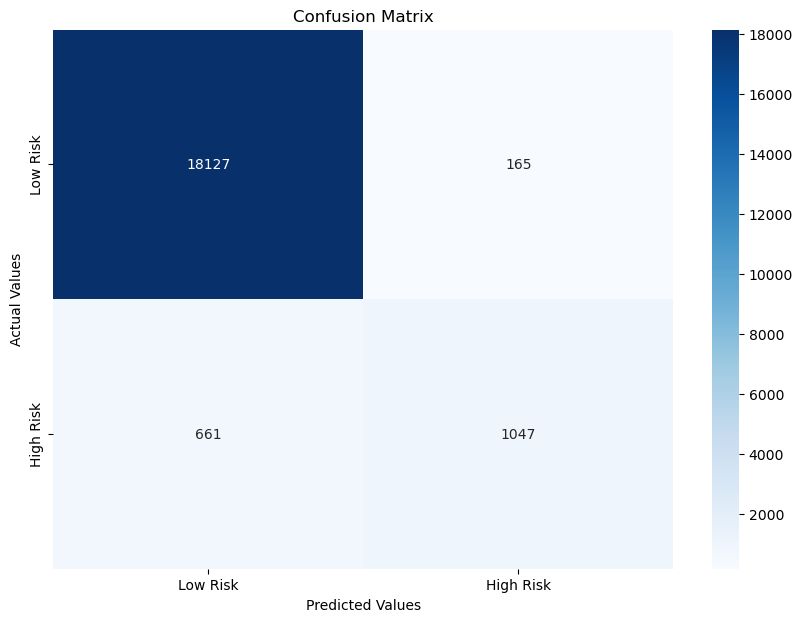

In [24]:
#Visualization 7
#visualizing confusion matrix with the help of heatmap
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['Low Risk','High Risk'],yticklabels=['Low Risk','High Risk'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()